### Resumen estadistico y Revision de Tipos de Datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datasets
movies_df = pd.read_csv('../data/movies_dataset_transformed.csv')
credits_df = pd.read_csv('../data/filtered_credits.csv')

### Chequeo de Nulos

In [ ]:
# 1. Chequeo de nulos
print("Chequeo de valores nulos en movies_df:")
print(movies_df.isnull().sum())
print("\nChequeo de valores nulos en credits_df:")
print(credits_df.isnull().sum())

### Valores Duplicados

In [ ]:
# 2. Valores duplicados
print("\nNúmero de valores duplicados en movies_df:")
print(movies_df.duplicated().sum())
print("\nNúmero de valores duplicados en credits_df:")
print(credits_df.duplicated().sum())

### Valores Faltantes

In [ ]:
# 3. Valores faltantes
print("\nPorcentaje de valores faltantes en movies_df:")
print(movies_df.isnull().mean() * 100)
print("\nPorcentaje de valores faltantes en credits_df:")
print(credits_df.isnull().mean() * 100)

### Tipos de Datos

In [ ]:
# 4. Tipos de datos
print("\nTipos de datos en movies_df:")
print(movies_df.dtypes)
print("\nTipos de datos en credits_df:")
print(credits_df.dtypes)

# Se sabe que algunos datos no tienen su tipo correspondiente, pero eso no influyo para realizar el proyecto

### Analisis estadisticos de datos

In [ ]:
# 5. Análisis estadístico de datos
print("\nAnálisis estadístico de datos en movies_df:")
print(movies_df.describe(include='all'))
print("\nAnálisis estadístico de datos en credits_df:")
print(credits_df.describe(include='all'))
    

### Analisis de correlaciones bi y multivariado


Análisis de correlaciones bivariadas en movies_df:
                          budget  popularity   revenue   runtime  \
budget                  1.000000    0.449645  0.768777  0.134733   
popularity              0.449645    1.000000  0.506179  0.129927   
revenue                 0.768777    0.506179  1.000000  0.103917   
runtime                 0.134733    0.129927  0.103917  1.000000   
vote_average            0.073494    0.154399  0.083868  0.158146   
vote_count              0.676642    0.559965  0.812022  0.113539   
collection_id                NaN         NaN       NaN       NaN   
collection_name              NaN         NaN       NaN       NaN   
collection_poster_path       NaN         NaN       NaN       NaN   
release_year            0.131675    0.131690  0.088355  0.078822   
return                 -0.002132    0.003221  0.000794  0.000901   

                        vote_average  vote_count  collection_id  \
budget                      0.073494    0.676642            NaN 

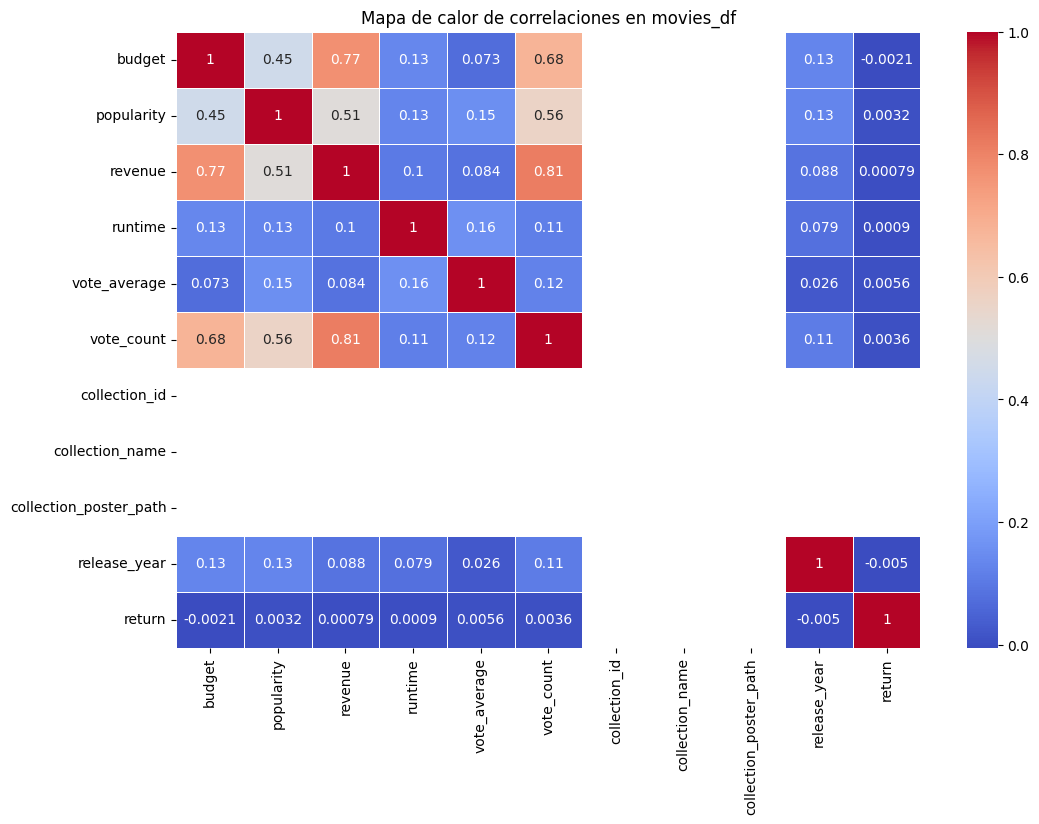

In [14]:
# 6. Análisis de correlaciones bivariadas
print("\nAnálisis de correlaciones bivariadas en movies_df:")
    
# Filtrar solo las columnas numéricas y convertir valores problemáticos a NaN
numeric_cols_movies = movies_df.select_dtypes(include=[np.number]).columns
    
# Convertir valores no numéricos o incorrectos a NaN para evitar errores en el cálculo
for col in numeric_cols_movies:
        movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')
    
# Recalcular la matriz de correlaciones solo con las columnas numéricas
correlation_matrix_movies = movies_df[numeric_cols_movies].corr()
print(correlation_matrix_movies)
    
# Graficar el mapa de calor de las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_movies, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de correlaciones en movies_df")
plt.show()

### Relaciones entre variables

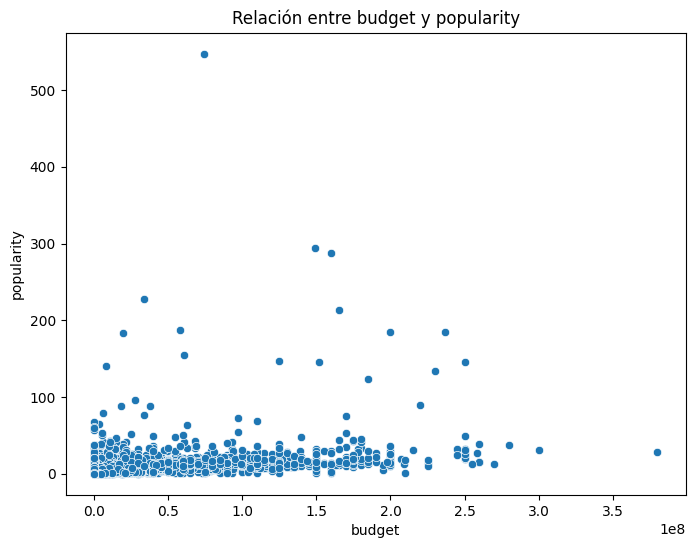

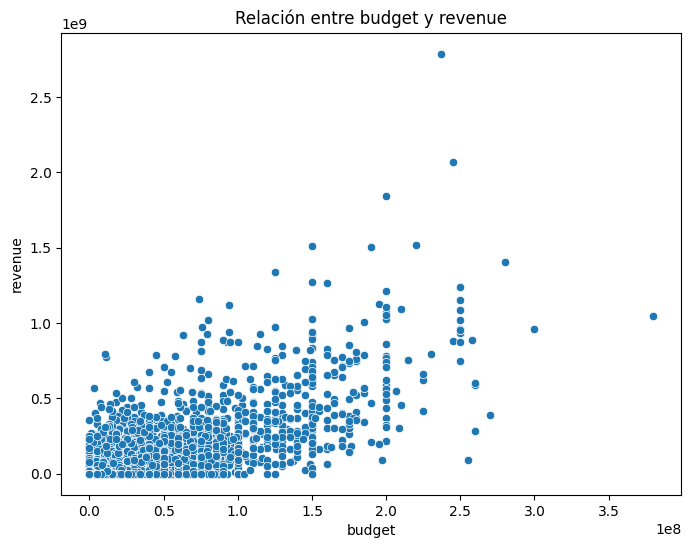

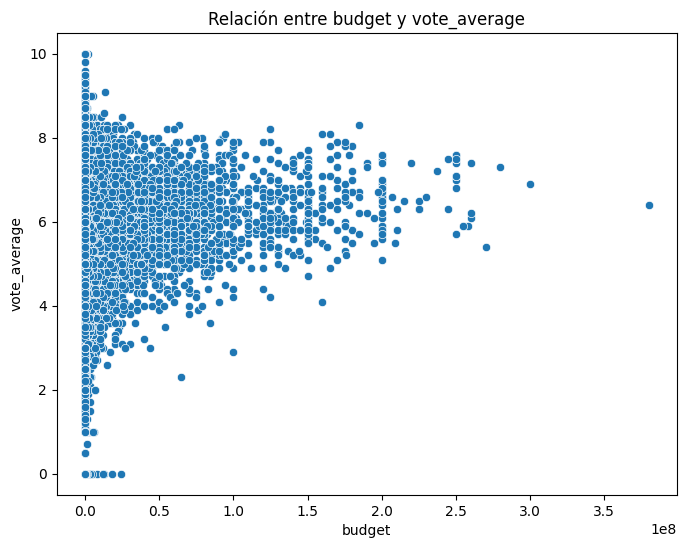

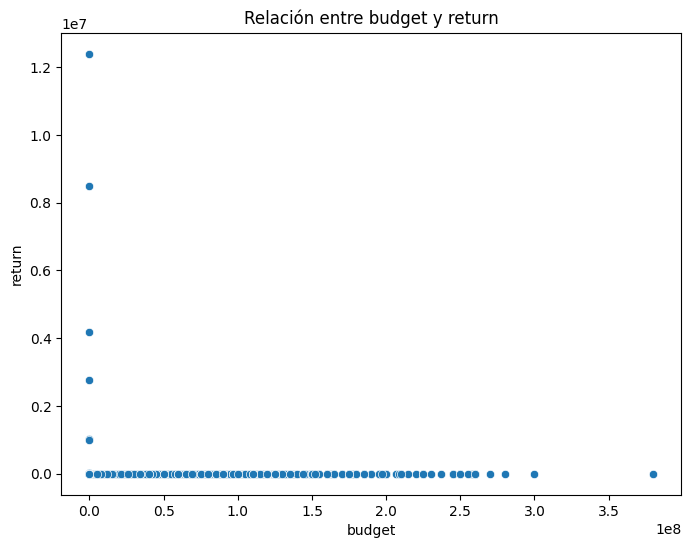

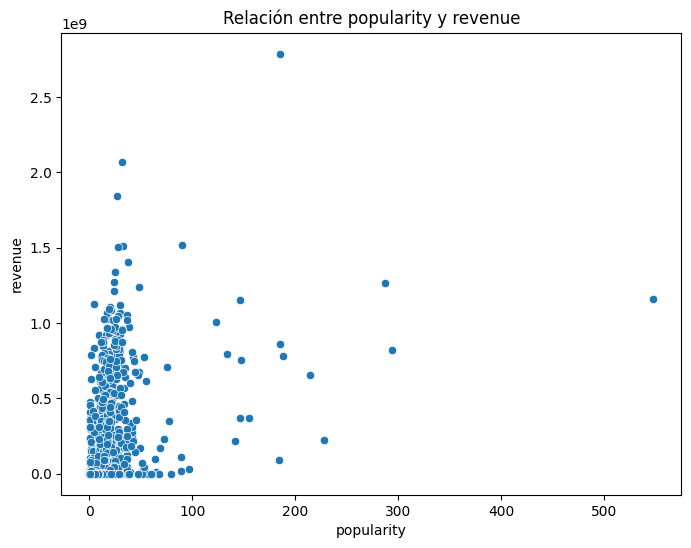

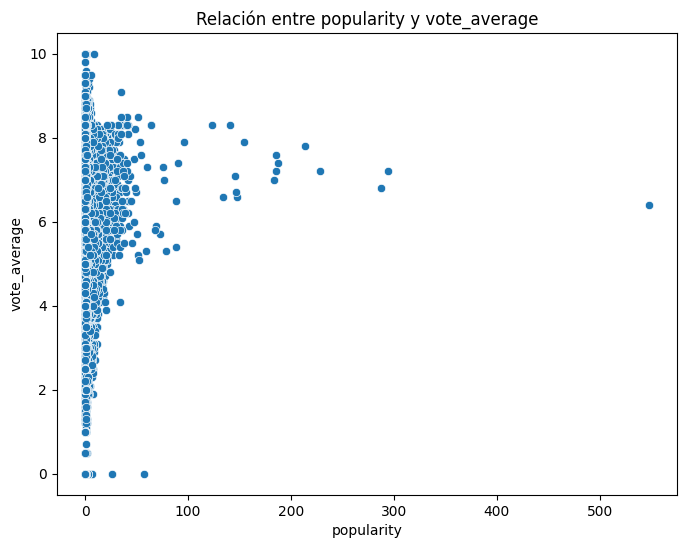

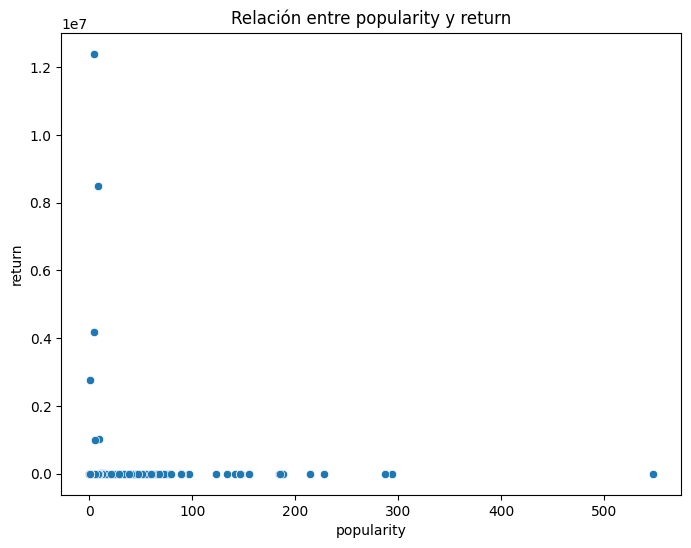

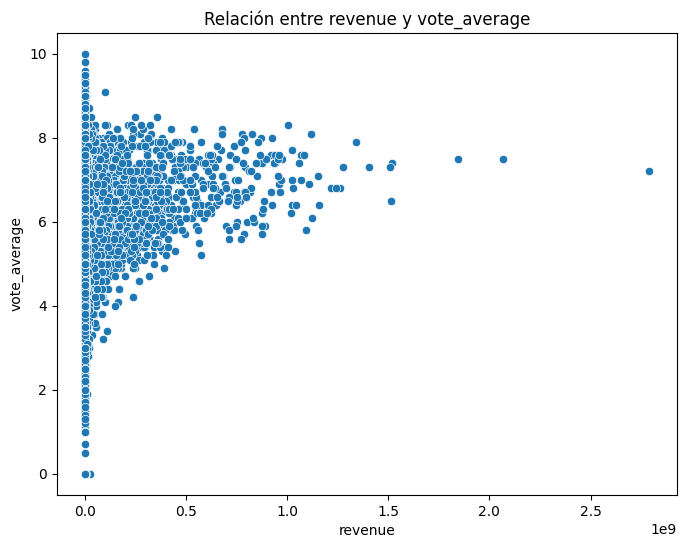

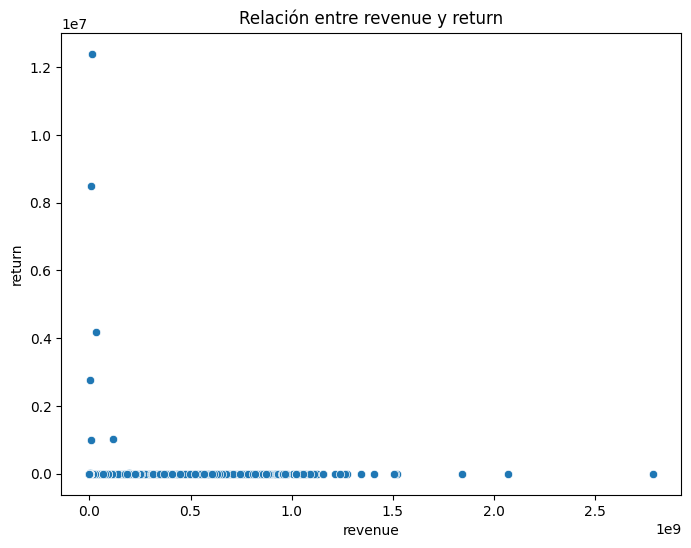

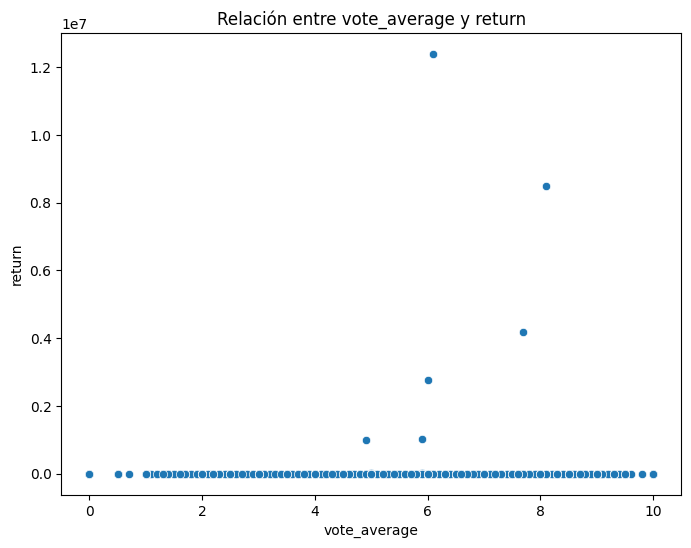

In [16]:
# Definir columnas numéricas
numeric_cols = ['budget', 'popularity', 'revenue', 'vote_average', 'return']

# Visualizar relaciones entre variables numéricas usando gráficos de dispersión
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=movies_df, x=col1, y=col2)
        plt.title(f'Relación entre {col1} y {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()


### Outliers o Anomalias

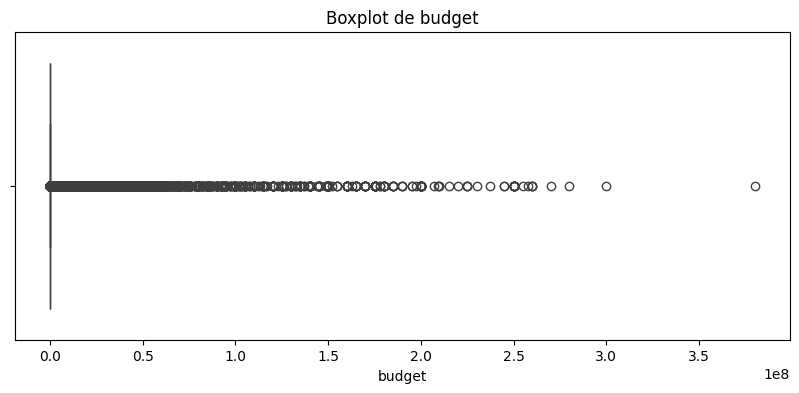

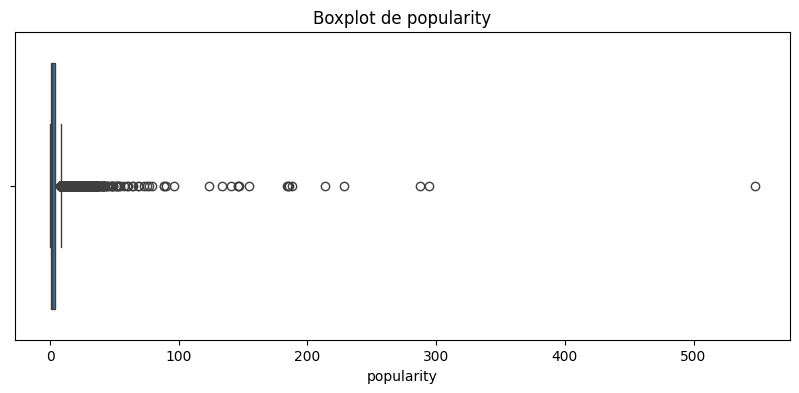

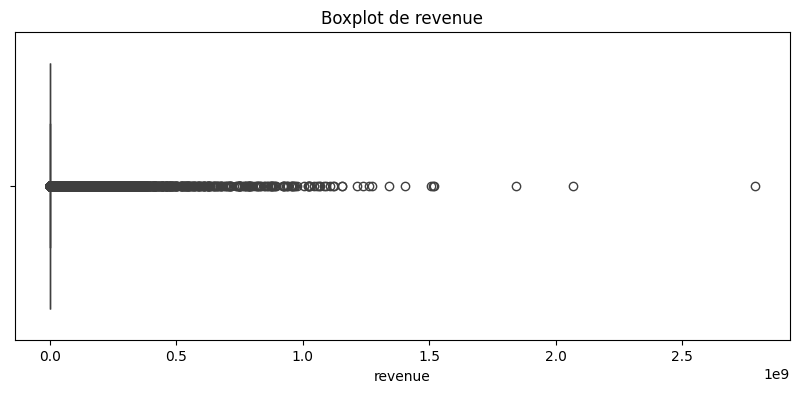

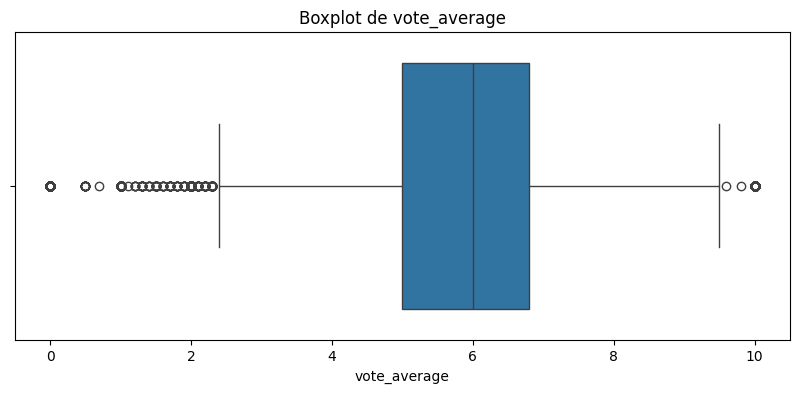

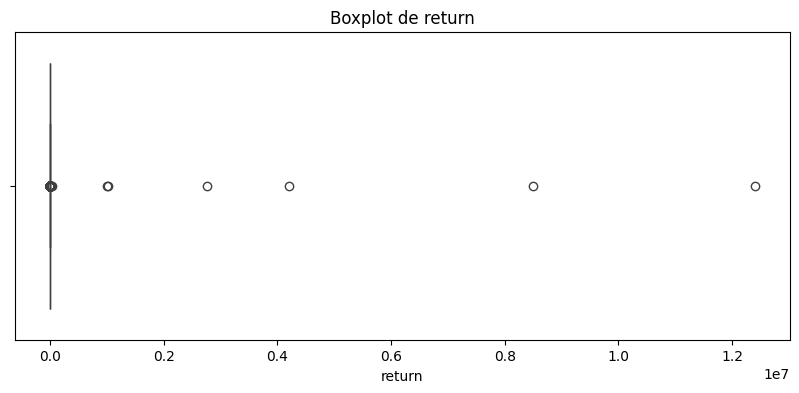

In [17]:
# Crear gráficos de caja para columnas numéricas
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=movies_df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

### Patrones Interesantes:

##### Frecuencia de Generos 

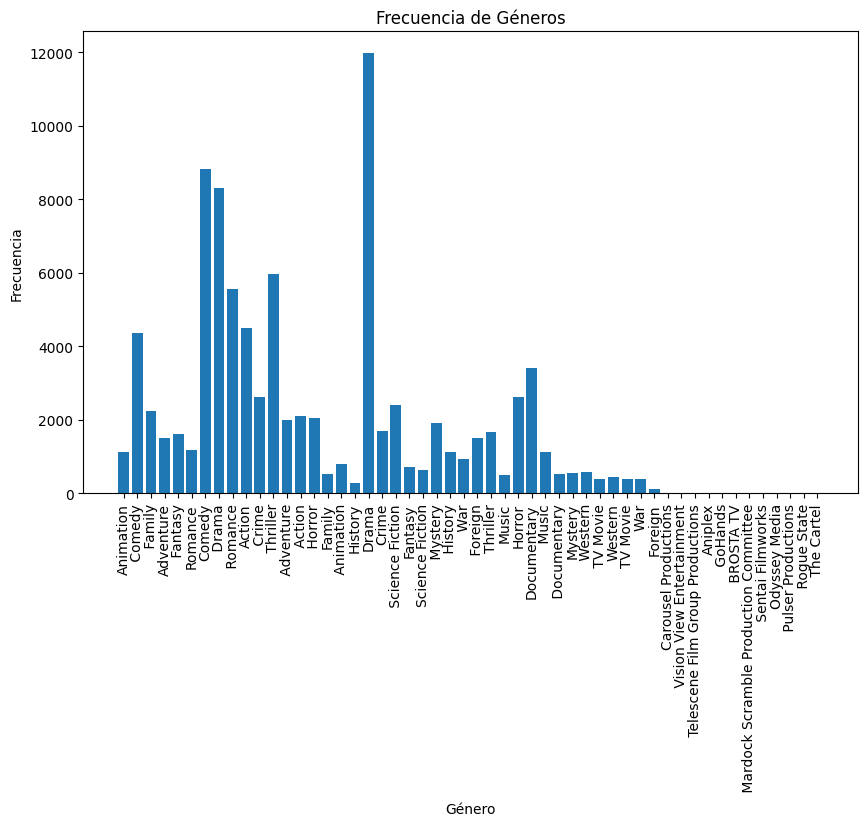

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar frecuencia de géneros
all_genres = ','.join(movies_df['genres'].dropna()).split(',')
genre_counts = Counter(all_genres)

# Gráfico de barras de géneros
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xticks(rotation=90)
plt.title('Frecuencia de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()



##### Numeros de peliculas por ano

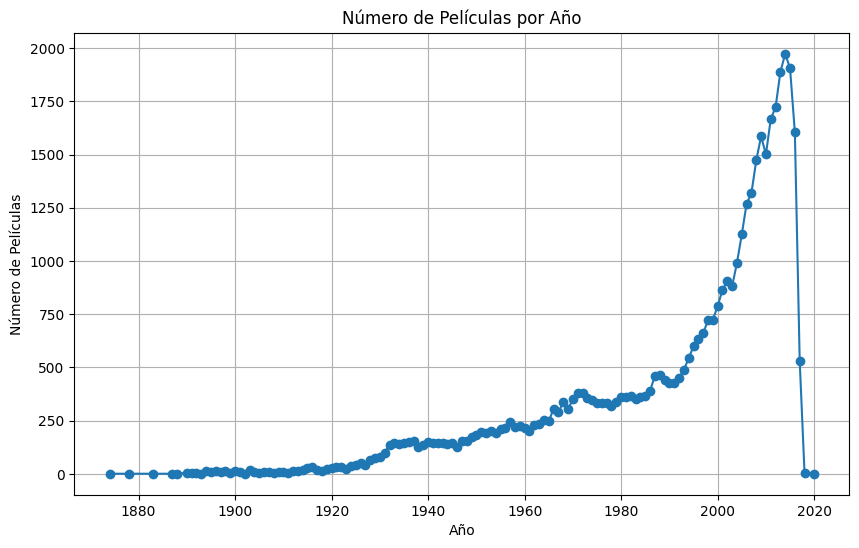

In [24]:
# Contar el número de películas por año
movies_per_year = movies_df['release_year'].value_counts().sort_index()

# Gráfico de líneas de películas por año
plt.figure(figsize=(10, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()


### Nubes de palabras / WordCloud

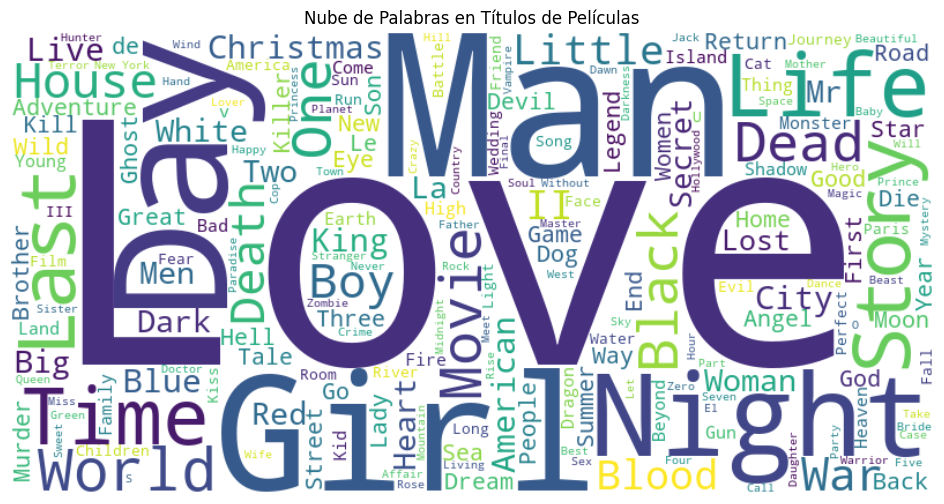

In [21]:
from wordcloud import WordCloud

# Crear una nube de palabras para los títulos de las películas
text = ' '.join(movies_df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en Títulos de Películas')
plt.show()